# Task 7: Get Basic Sales Summary from a Tiny SQLite Database using Python

## Objective
The goal of this task is to use SQL within Python to extract basic sales information (total quantity sold and total revenue) from a small SQLite database, display the results using print statements, and visualize them with a simple bar chart.

## Tools Used
- **Python**: `sqlite3` for database operations, `pandas` for data manipulation, `matplotlib` for visualization.
- **SQLite**: Built-in database engine in Python.
- **Dataset**: A synthetic `sales` table in `sales_data.db`.

## Deliverables
- Jupyter Notebook (`Task7_SalesSummary.ipynb`) containing the Python script, SQL queries, printed results, and bar chart.
- Bar chart image (`sales_chart.png`) saved from the visualization.

In [1]:
# Import sqlite3 to create and interact with the SQLite database
import sqlite3

# Connect to (or create) the SQLite database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
    )
''')

# Insert synthetic sales data
sales_data = [
    ("Laptop", 5, 1000.00),
    ("Laptop", 3, 1000.00),
    ("Phone", 10, 500.00),
    ("Phone", 7, 500.00),
    ("Tablet", 4, 300.00),
    ("Tablet", 2, 300.00),
    ("Headphones", 15, 50.00),
    ("Headphones", 10, 50.00)
]

# Insert the data into the sales table
cursor.executemany("INSERT OR IGNORE INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

# Commit the changes and close the connection
conn.commit()

# Verify the data by selecting all rows
cursor.execute("SELECT * FROM sales")
print("Sales Table Contents:")
for row in cursor.fetchall():
    print(row)

# Close the connection (we'll reopen it later for queries)
conn.close()

Sales Table Contents:
(1, 'Laptop', 5, 1000.0)
(2, 'Laptop', 3, 1000.0)
(3, 'Phone', 10, 500.0)
(4, 'Phone', 7, 500.0)
(5, 'Tablet', 4, 300.0)
(6, 'Tablet', 2, 300.0)
(7, 'Headphones', 15, 50.0)
(8, 'Headphones', 10, 50.0)


## Sales Summary Analysis
We will:
1. Connect to the `sales_data.db` database.
2. Run a SQL query to calculate total quantity sold and total revenue per product.
3. Load the results into a Pandas DataFrame.
4. Display the results using print statements.
5. Visualize the revenue using a simple bar chart.

Sales Summary:
      product  total_qty  revenue
0  Headphones         25   1250.0
1      Laptop          8   8000.0
2       Phone         17   8500.0
3      Tablet          6   1800.0


<Figure size 800x500 with 0 Axes>

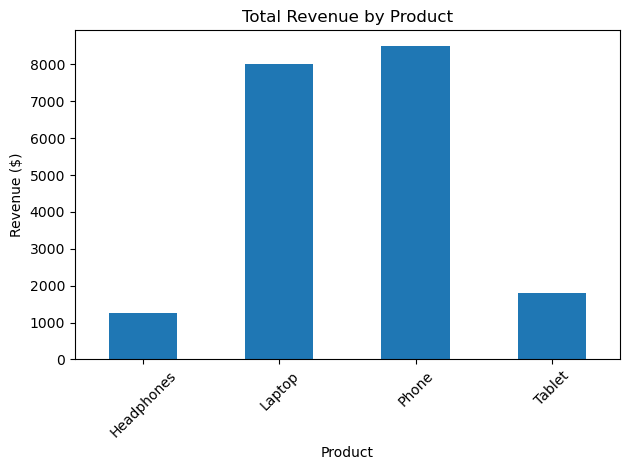

In [3]:
# Import required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# SQL query to calculate total quantity sold and total revenue per product
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load the query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the results using print statements
print("Sales Summary:")
print(df)

# Plot a bar chart for revenue per product
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as an image
plt.savefig("sales_chart.png")

# Display the chart in the notebook
plt.show()